In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
## Creating synthetic data points
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,
                          n_clusters_per_class=2, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

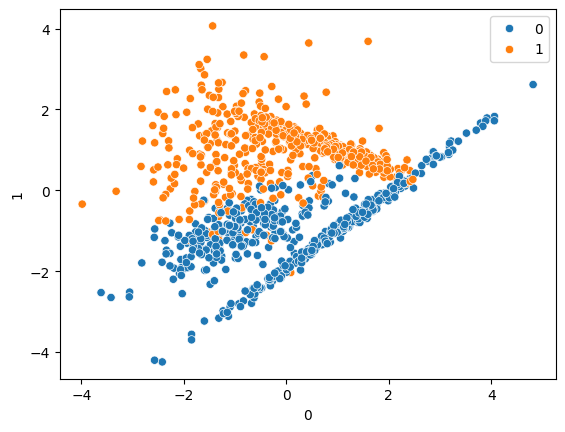

In [65]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [67]:
from sklearn.svm import SVC

In [68]:
svc = SVC(kernel="linear")

In [69]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [70]:
y_pred = svc.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       123
           1       0.94      0.92      0.93       127

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[115   8]
 [ 10 117]]


In [72]:
rbf = SVC(kernel="rbf")

In [73]:
rbf.fit(X_train,y_train)

SVC()

In [74]:
y_pred = rbf.predict(X_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       123
           1       0.98      0.91      0.95       127

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[121   2]
 [ 11 116]]


In [76]:
poly = SVC(kernel='poly')
poly.fit(X_train, y_train)
y_pred = poly.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       123
           1       0.85      0.95      0.90       127

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250

[[102  21]
 [  6 121]]


In [77]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
y_pred = sigmoid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       123
           1       0.84      0.87      0.86       127

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

[[102  21]
 [ 16 111]]


## Hyperparameter tuning

In [78]:
from sklearn.model_selection import GridSearchCV

params = {"C":[0.1,1,10,100,1000],
          "gamma":[1,0.1,0.01,0.001,0.0001],
          "kernel":['rbf','linear','poly']}

In [79]:
grid = GridSearchCV(SVC(), param_grid=params, cv=5, verbose=5, refit=True)

In [80]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.893 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=5)

In [81]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [83]:
y_pred = grid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       123
           1       0.99      0.91      0.95       127

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[122   1]
 [ 11 116]]
